<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento Jhonathan Giraldo
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [1]:
import pandas as pd 
import tweepy

In [2]:
# Leer llaves
keys = pd.read_csv("keys.csv", header=None,sep =";")
keys = dict(zip(keys[0],keys[1]))

In [3]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
tweets = tweepy.Cursor(api.search,
                       q=["cartagena -RT"],
                       lang='es',
                       geocode=f'4.570868,-74.297333,30mi',
                       tweet_mode='extended',
                       include_rts=False).items(3000)

In [5]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Colombia")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [6]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data.head(50)

,tweet,date,city,user_location,id,link
0,@DianaMunozC Seguro son deliciosas las de Mago...,2020-11-21 02:56:02,Colombia,Bogota,1329981870038245376,https://twitter.com/i/web/status/1329981870038...
1,Pagar 20.000 por una arepa'e'huevo en Cartagen...,2020-11-21 02:41:59,Colombia,Bogotá,1329978334860750850,https://twitter.com/i/web/status/1329978334860...
2,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Colombia,Bogotá-Colombia,1329975331822989312,https://twitter.com/i/web/status/1329975331822...
3,Lo mejor en Cartagena para fritos es Narcoboll...,2020-11-21 02:01:21,Colombia,Colombia,1329968111123099651,https://twitter.com/i/web/status/1329968111123...
4,Nuestra @DefensaCivilCo continúa trabajando ar...,2020-11-21 01:56:41,Colombia,"Bogotá, Colombia.",1329966934230753282,https://twitter.com/i/web/status/1329966934230...
5,"@daulaw Alcalde AMO a Cartagena, fue la ciudad...",2020-11-21 01:33:37,Colombia,Colombia,1329961129695653890,https://twitter.com/i/web/status/1329961129695...
6,#FútbolFemenino\n\nCon goles de Cartagena por ...,2020-11-21 01:30:25,Colombia,Bogotá,1329960322464100352,https://twitter.com/i/web/status/1329960322464...
7,"Ganas de “Carlos Vives - Que Diera”, una terra...",2020-11-21 00:46:22,Colombia,"Bogotá, Colombia",1329949237795282944,https://twitter.com/i/web/status/1329949237795...
8,"$5000 portabilidad en cualquier plan, aplican ...",2020-11-21 00:14:11,Colombia,Bogotá,1329941141547085825,https://twitter.com/i/web/status/1329941141547...
9,¿Cartagena es una isla? https://t.co/JRJQ0o2B4j,2020-11-20 23:27:02,Colombia,Bogotá,1329929273201872896,https://twitter.com/i/web/status/1329929273201...


In [7]:
data.shape

(1365, 6)

In [8]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [9]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions
0,@DianaMunozC Seguro son deliciosas las de Mago...,2020-11-21 02:56:02,Colombia,Bogota,1329981870038245376,https://twitter.com/i/web/status/1329981870038...,Seguro son deliciosas las de Magola. \n\nEn u...,[],[],[@DianaMunozC]
1,Pagar 20.000 por una arepa'e'huevo en Cartagen...,2020-11-21 02:41:59,Colombia,Bogotá,1329978334860750850,https://twitter.com/i/web/status/1329978334860...,Pagar 20.000 por una arepa'e'huevo en Cartagen...,[],[],[]
2,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Colombia,Bogotá-Colombia,1329975331822989312,https://twitter.com/i/web/status/1329975331822...,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[]
3,Lo mejor en Cartagena para fritos es Narcoboll...,2020-11-21 02:01:21,Colombia,Colombia,1329968111123099651,https://twitter.com/i/web/status/1329968111123...,Lo mejor en Cartagena para fritos es Narcoboll...,[https://t.co/GyqMN9Tvpr],[],[]
4,Nuestra @DefensaCivilCo continúa trabajando ar...,2020-11-21 01:56:41,Colombia,"Bogotá, Colombia.",1329966934230753282,https://twitter.com/i/web/status/1329966934230...,Nuestra continúa trabajando arduamente apoyan...,[https://t.co/xeXqwgCZz1],"[#Cartagena, #ListosEnPazOEmergencia, #LaInsti...","[@DefensaCivilCo, @infopresidencia]"


In [10]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [11]:
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis
0,@DianaMunozC Seguro son deliciosas las de Mago...,2020-11-21 02:56:02,Colombia,Bogota,1329981870038245376,https://twitter.com/i/web/status/1329981870038...,Seguro son deliciosas las de Magola. \n\nEn u...,[],[],[@DianaMunozC],[]
1,Pagar 20.000 por una arepa'e'huevo en Cartagen...,2020-11-21 02:41:59,Colombia,Bogotá,1329978334860750850,https://twitter.com/i/web/status/1329978334860...,Pagar 20.000 por una arepa'e'huevo en Cartagen...,[],[],[],[]
2,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Colombia,Bogotá-Colombia,1329975331822989312,https://twitter.com/i/web/status/1329975331822...,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[],"[🌊, ⤵, 👉]"
3,Lo mejor en Cartagena para fritos es Narcoboll...,2020-11-21 02:01:21,Colombia,Colombia,1329968111123099651,https://twitter.com/i/web/status/1329968111123...,Lo mejor en Cartagena para fritos es Narcoboll...,[https://t.co/GyqMN9Tvpr],[],[],[]
4,Nuestra @DefensaCivilCo continúa trabajando ar...,2020-11-21 01:56:41,Colombia,"Bogotá, Colombia.",1329966934230753282,https://twitter.com/i/web/status/1329966934230...,Nuestra continúa trabajando arduamente apoyan...,[https://t.co/xeXqwgCZz1],"[#Cartagena, #ListosEnPazOEmergencia, #LaInsti...","[@DefensaCivilCo, @infopresidencia]",[]


In [12]:
from googletrans import Translator
translator = Translator()

In [13]:
data['ing'] = data['clean'].apply(lambda valor:translator.translate(valor,src='es', dest='en'))

In [14]:
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis,ing
0,@DianaMunozC Seguro son deliciosas las de Mago...,2020-11-21 02:56:02,Colombia,Bogota,1329981870038245376,https://twitter.com/i/web/status/1329981870038...,Seguro son deliciosas las de Magola. \n\nEn u...,[],[],[@DianaMunozC],[],"Translated(src=es, dest=en, text=The ones from..."
1,Pagar 20.000 por una arepa'e'huevo en Cartagen...,2020-11-21 02:41:59,Colombia,Bogotá,1329978334860750850,https://twitter.com/i/web/status/1329978334860...,Pagar 20.000 por una arepa'e'huevo en Cartagen...,[],[],[],[],"Translated(src=es, dest=en, text=Paying 20,000..."
2,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Colombia,Bogotá-Colombia,1329975331822989312,https://twitter.com/i/web/status/1329975331822...,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[],"[🌊, ⤵, 👉]","Translated(src=es, dest=en, text=🌊 While Hurri..."
3,Lo mejor en Cartagena para fritos es Narcoboll...,2020-11-21 02:01:21,Colombia,Colombia,1329968111123099651,https://twitter.com/i/web/status/1329968111123...,Lo mejor en Cartagena para fritos es Narcoboll...,[https://t.co/GyqMN9Tvpr],[],[],[],"Translated(src=es, dest=en, text=The best in C..."
4,Nuestra @DefensaCivilCo continúa trabajando ar...,2020-11-21 01:56:41,Colombia,"Bogotá, Colombia.",1329966934230753282,https://twitter.com/i/web/status/1329966934230...,Nuestra continúa trabajando arduamente apoyan...,[https://t.co/xeXqwgCZz1],"[#Cartagena, #ListosEnPazOEmergencia, #LaInsti...","[@DefensaCivilCo, @infopresidencia]",[],"Translated(src=es, dest=en, text=Nuestra conti..."


In [15]:
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis,ing,ingles
0,@DianaMunozC Seguro son deliciosas las de Mago...,2020-11-21 02:56:02,Colombia,Bogota,1329981870038245376,https://twitter.com/i/web/status/1329981870038...,Seguro son deliciosas las de Magola. \n\nEn u...,[],[],[@DianaMunozC],[],"Translated(src=es, dest=en, text=The ones from...",The ones from Magola are sure to be delicious....
1,Pagar 20.000 por una arepa'e'huevo en Cartagen...,2020-11-21 02:41:59,Colombia,Bogotá,1329978334860750850,https://twitter.com/i/web/status/1329978334860...,Pagar 20.000 por una arepa'e'huevo en Cartagen...,[],[],[],[],"Translated(src=es, dest=en, text=Paying 20,000...","Paying 20,000 for an arepa'e'huevo in Cartagen..."
2,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Colombia,Bogotá-Colombia,1329975331822989312,https://twitter.com/i/web/status/1329975331822...,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[],"[🌊, ⤵, 👉]","Translated(src=es, dest=en, text=🌊 While Hurri...",🌊 While Hurricane Iota left incalculable losse...
3,Lo mejor en Cartagena para fritos es Narcoboll...,2020-11-21 02:01:21,Colombia,Colombia,1329968111123099651,https://twitter.com/i/web/status/1329968111123...,Lo mejor en Cartagena para fritos es Narcoboll...,[https://t.co/GyqMN9Tvpr],[],[],[],"Translated(src=es, dest=en, text=The best in C...",The best in Cartagena for fried foods is Narco...
4,Nuestra @DefensaCivilCo continúa trabajando ar...,2020-11-21 01:56:41,Colombia,"Bogotá, Colombia.",1329966934230753282,https://twitter.com/i/web/status/1329966934230...,Nuestra continúa trabajando arduamente apoyan...,[https://t.co/xeXqwgCZz1],"[#Cartagena, #ListosEnPazOEmergencia, #LaInsti...","[@DefensaCivilCo, @infopresidencia]",[],"Translated(src=es, dest=en, text=Nuestra conti...",Nuestra continues to work hard supporting the ...


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [17]:
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis,ing,ingles,sentimiento
0,@DianaMunozC Seguro son deliciosas las de Mago...,2020-11-21 02:56:02,Colombia,Bogota,1329981870038245376,https://twitter.com/i/web/status/1329981870038...,Seguro son deliciosas las de Magola. \n\nEn u...,[],[],[@DianaMunozC],[],"Translated(src=es, dest=en, text=The ones from...",The ones from Magola are sure to be delicious....,0.9061
1,Pagar 20.000 por una arepa'e'huevo en Cartagen...,2020-11-21 02:41:59,Colombia,Bogotá,1329978334860750850,https://twitter.com/i/web/status/1329978334860...,Pagar 20.000 por una arepa'e'huevo en Cartagen...,[],[],[],[],"Translated(src=es, dest=en, text=Paying 20,000...","Paying 20,000 for an arepa'e'huevo in Cartagen...",-0.5267
2,#ESTRENO\n\n🌊 Mientras que el Huracán Iota dej...,2020-11-21 02:30:03,Colombia,Bogotá-Colombia,1329975331822989312,https://twitter.com/i/web/status/1329975331822...,\n\n🌊 Mientras que el Huracán Iota dejó perdid...,"[https://t.co/7aJFvQGpnZ, https://t.co/51ojcZX...",[#ESTRENO],[],"[🌊, ⤵, 👉]","Translated(src=es, dest=en, text=🌊 While Hurri...",🌊 While Hurricane Iota left incalculable losse...,-0.6597
3,Lo mejor en Cartagena para fritos es Narcoboll...,2020-11-21 02:01:21,Colombia,Colombia,1329968111123099651,https://twitter.com/i/web/status/1329968111123...,Lo mejor en Cartagena para fritos es Narcoboll...,[https://t.co/GyqMN9Tvpr],[],[],[],"Translated(src=es, dest=en, text=The best in C...",The best in Cartagena for fried foods is Narco...,0.9153
4,Nuestra @DefensaCivilCo continúa trabajando ar...,2020-11-21 01:56:41,Colombia,"Bogotá, Colombia.",1329966934230753282,https://twitter.com/i/web/status/1329966934230...,Nuestra continúa trabajando arduamente apoyan...,[https://t.co/xeXqwgCZz1],"[#Cartagena, #ListosEnPazOEmergencia, #LaInsti...","[@DefensaCivilCo, @infopresidencia]",[],"Translated(src=es, dest=en, text=Nuestra conti...",Nuestra continues to work hard supporting the ...,0.3612


In [25]:
dataresumen = data[['tweet', 'sentimiento']].sort_values('sentimiento')
dataresumen

,tweet,sentimiento
1088,Yo acabando de llegar a Cartagena 😭😭😭 2020 per...,-0.9775
517,"Los videos y las imágenes de Cartagena, Chocó,...",-0.9728
223,Providencia será reconstruida. Listo plan para...,-0.9453
30,La Policía abatió a delincuente por robar una ...,-0.9118
21,La pelea entre @DauLaw y su aliado comenzó púb...,-0.8934
...,...,...
528,Cartagena y Antioquia del primer grupo 💕💕💕💃🏼,0.9313
551,¡Aplausos! Colombia tierra querida: San Andrés...,0.9348
213,Felices con su amado invierno ? Felices con su...,0.9547
167,Amando cada día más a mi música hermosa que me...,0.9641


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [34]:
Positivos = dataresumen['sentimiento']>0
Positivos = dataresumen[Positivos]
Positivos.sort_values('sentimiento',ascending=False)


,tweet,sentimiento
407,#MissUniverseColombia Enhorabuena #Bolivar Fel...,0.9758
167,Amando cada día más a mi música hermosa que me...,0.9641
213,Felices con su amado invierno ? Felices con su...,0.9547
551,¡Aplausos! Colombia tierra querida: San Andrés...,0.9348
528,Cartagena y Antioquia del primer grupo 💕💕💕💃🏼,0.9313
...,...,...
298,@joseshidarta Para lavar dólares de la Mafia. ...,0.0382
489,Para aquellos que en Colombia aún ponen en dud...,0.0323
125,"La @LaContratopedia Caribe, un proyecto de @Ta...",0.0258
44,"Desde 2008, en Cartagena se habla de la interv...",0.0258


### El Tweet mas positivo corresponde a un tweet sobre miss universo

In [36]:
Positivos = dataresumen['sentimiento']<0
Positivos = dataresumen[Positivos]
Positivos.sort_values('sentimiento',ascending=True)

,tweet,sentimiento
1088,Yo acabando de llegar a Cartagena 😭😭😭 2020 per...,-0.9775
517,"Los videos y las imágenes de Cartagena, Chocó,...",-0.9728
223,Providencia será reconstruida. Listo plan para...,-0.9453
30,La Policía abatió a delincuente por robar una ...,-0.9118
21,La pelea entre @DauLaw y su aliado comenzó púb...,-0.8934
...,...,...
24,"Desde el inicio de su mandato, el alcalde de C...",-0.0772
376,#Regiones | Por consecuencias de las fuertes l...,-0.0754
409,Necesito que salga el típo de hace unos años e...,-0.0572
386,Yo no quiero ganarme millones...\n#WalterHerna...,-0.0572


### El Tweet mas positivo corresponde a un tweet sobre el clima en cartagena

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

### Positivos 315
### Negativos 366

###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3



###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [38]:
import numpy as np
 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
 
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
 
import matplotlib.pyplot as plt
import PIL.Image

from IPython.display import display

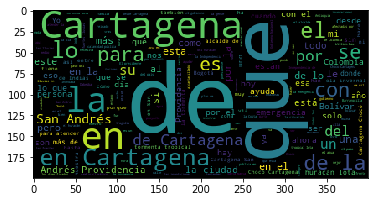

In [39]:
palabras = data.clean.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)
 
plt.imshow(wordcloud)
plt.show()

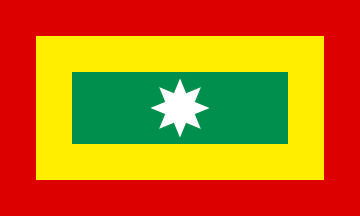

In [40]:
cartagena = PIL.Image.open("colombia.png")
display(cartagena)


In [41]:
mask = np.array(cartagena)
mask

array([[[221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        ...,
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255]],

       [[221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        ...,
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255]],

       [[221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        ...,
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255]],

       ...,

       [[221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        ...,
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255]],

       [[221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        ...,
        [221,   0,   0, 255],
        [221,   0,   0, 255],
        [221,   0,   0, 255]],

       [[221

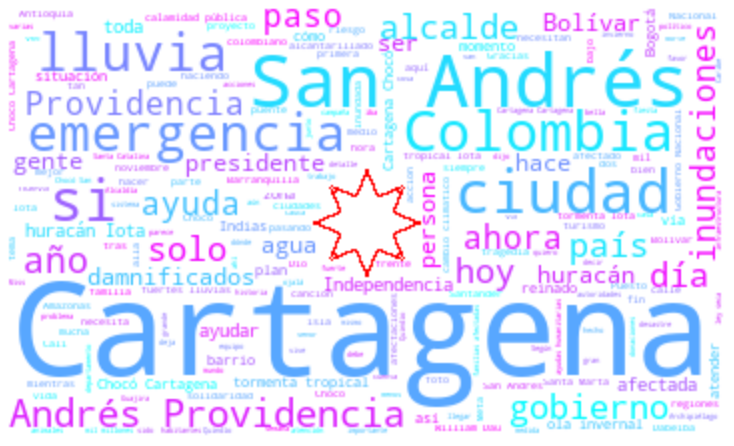

In [43]:
palabras = data.clean.str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='cool',
                      stopwords=stopwords,
                      mask=mask, contour_width=0.5, contour_color='red').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("colombia1.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()